In [36]:
#>> SVM DecisionTreeClassifier LogisticRegression

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

In [17]:
def Dataset1():
    X, y = make_blobs(n_samples=1000, centers=2, 
                    random_state=0, cluster_std=0.40)
    
    # Standard Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

In [18]:
def Dataset2():
    X, y = make_blobs(n_samples=1000, centers=2,
                    random_state=0, cluster_std=1.40)
    
    # Standard Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

In [19]:
def Dataset3():
    X, y = make_circles(n_samples=1000, noise=0.06, factor=0.8)
    return X, y

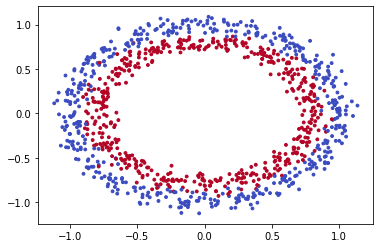

In [20]:
X, y = Dataset3()

plt.scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')

In [112]:
# Untrained model
# (X, y)
def FitModelAndPlotPredictions(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)
    
    #Train the model using the training sets
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    
    # print('Accuracy: ', 100 * (pred == y_val).sum() / len(y_val))

    # Plot mesh
    h = 0.05  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    
    accuracy = "{:.2f}".format(metrics.accuracy_score(pred, y_val))
    precision = "{:.2f}".format(metrics.precision_score(pred, y_val))
    recall = "{:.2f}".format(metrics.recall_score(pred, y_val))
    title = 'Accuracy: ' + accuracy + '\nPrecision: ' + precision + '\nRecall:' + recall
    plt.title(title)
    
    # Plot actual points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')

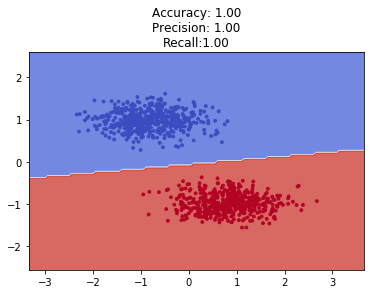

In [113]:
# SVM Linear Kernel on Dataset1
model = svm.SVC(kernel='linear')
X, y = Dataset1()
FitModelAndPlotPredictions(model, X, y)
plt.show()

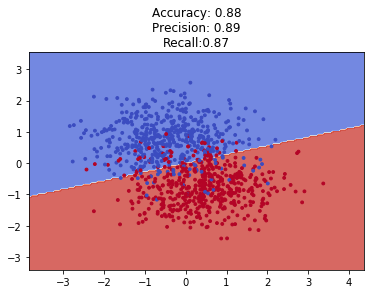

In [114]:
# SVM Linear Kernel on Dataset2
model = svm.SVC(kernel='linear')
X, y = Dataset2()
FitModelAndPlotPredictions(model, X, y)

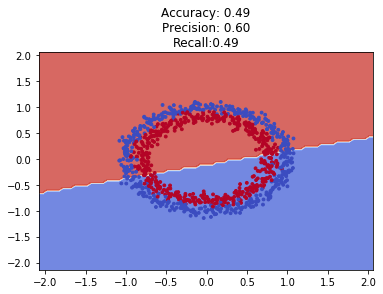

In [115]:
# SVM Linear Kernel on Dataset3
model = svm.SVC(kernel='linear')
X, y = Dataset3()
FitModelAndPlotPredictions(model, X, y)

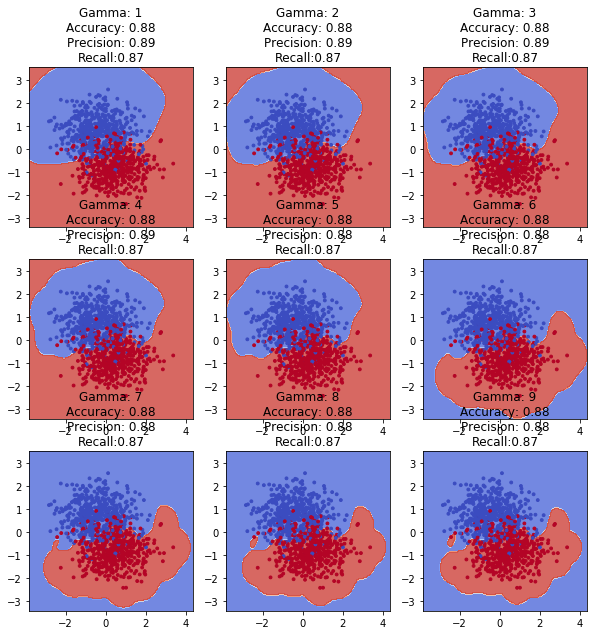

In [118]:
# SVM RBF Kernel on Dataset2

X, y = Dataset2()
fig = plt.figure(figsize=(10,10))
fig.tight_layout()
colsize = 3
rowsize = 3
for gamma in range(1, colsize*rowsize +1):   
    model = svm.SVC(kernel='rbf', gamma=gamma)
    fig.add_subplot(rowsize, colsize, gamma)
    FitModelAndPlotPredictions(model, X, y)
    curr_title = plt.gca().get_title()
    plt.title('Gamma: ' + str(gamma) + '\n' + curr_title)

plt.show()

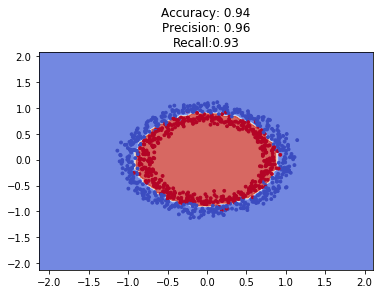

In [119]:
# SVM RBF Kernel on Dataset3
model = svm.SVC(kernel='rbf', gamma=3)
X, y = Dataset3()
FitModelAndPlotPredictions(model, X, y)

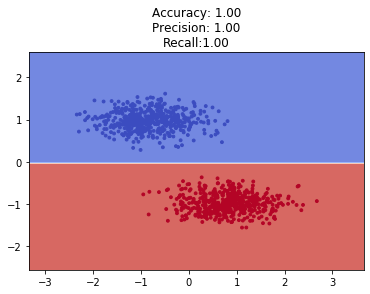

In [120]:
# DecisionTreeClassifier on Dataset1
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
X, y = Dataset1()
FitModelAndPlotPredictions(model, X, y)

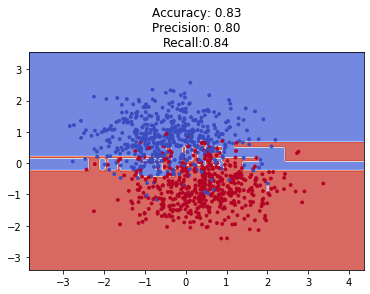

In [121]:
# DecisionTreeClassifier on Dataset2
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
X, y = Dataset2()
FitModelAndPlotPredictions(model, X, y)

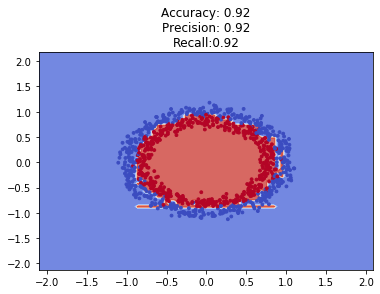

In [122]:
# DecisionTreeClassifier on Dataset3
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
X, y = Dataset3()
FitModelAndPlotPredictions(model, X, y)

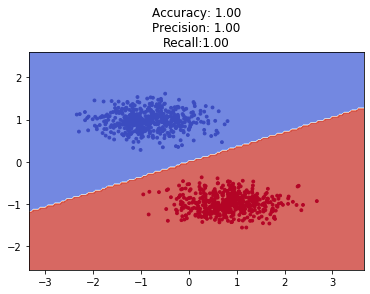

In [123]:
# LogisticRegression on Dataset1
model = LogisticRegression(penalty='l2')
X, y = Dataset1()
FitModelAndPlotPredictions(model, X, y)

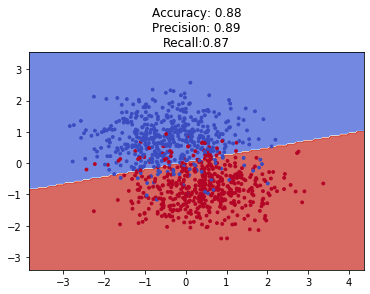

In [124]:
# LogisticRegression on Dataset2
model = LogisticRegression(penalty='l2')
X, y = Dataset2()
FitModelAndPlotPredictions(model, X, y)

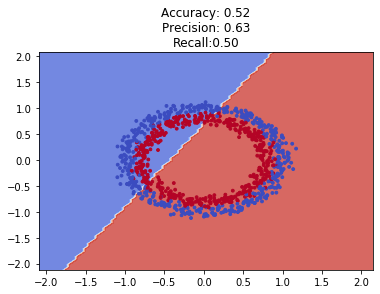

In [125]:
# LogisticRegression on Dataset3
model = LogisticRegression(penalty='l2')
X, y = Dataset3()
FitModelAndPlotPredictions(model, X, y)

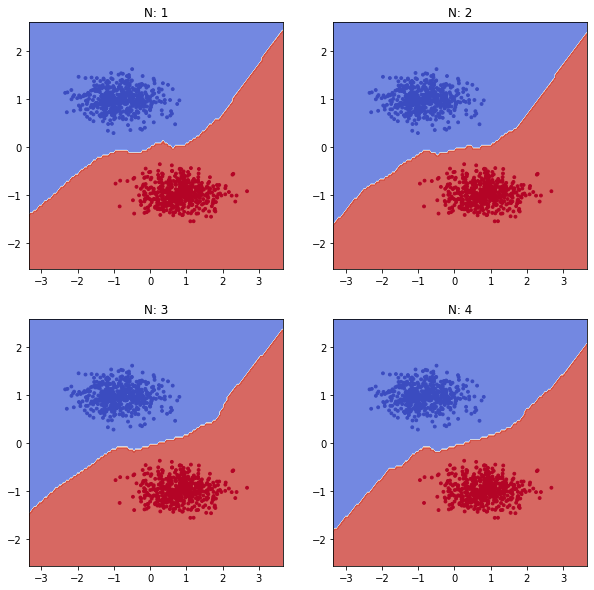

In [126]:
# kNN on Dataset1

X, y = Dataset1()
fig = plt.figure(figsize=(10,10))
fig.tight_layout()
colsize = 2
rowsize = 2
for num in range(1, colsize*rowsize +1):   
    model = KNeighborsClassifier(n_neighbors = num)
    fig.add_subplot(rowsize, colsize, num)
    FitModelAndPlotPredictions(model, X, y)
    plt.title('N: ' + str(num))

plt.show()

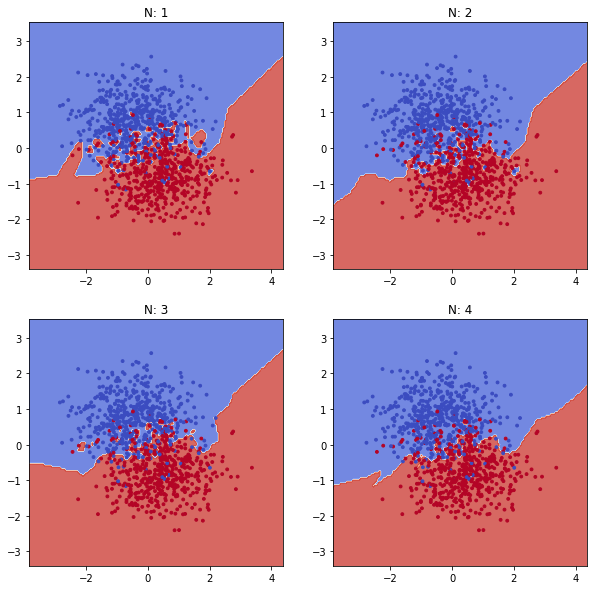

In [127]:
# kNN on Dataset2

X, y = Dataset2()
fig = plt.figure(figsize=(10,10))
fig.tight_layout()
colsize = 2
rowsize = 2
for num in range(1, colsize*rowsize +1):   
    model = KNeighborsClassifier(n_neighbors = num)
    fig.add_subplot(rowsize, colsize, num)
    FitModelAndPlotPredictions(model, X, y)
    plt.title('N: ' + str(num))

plt.show()

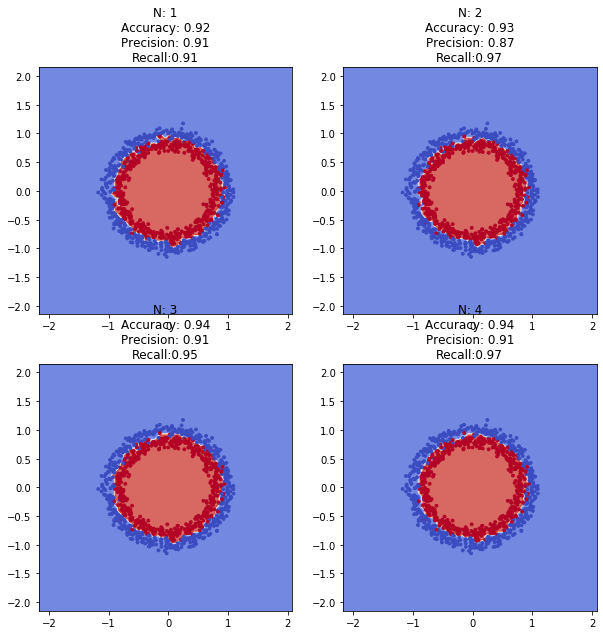

In [128]:
# kNN on Dataset3

X, y = Dataset3()
fig = plt.figure(figsize=(10,10))
fig.tight_layout()
colsize = 2
rowsize = 2
for num in range(1, colsize*rowsize +1):   
    model = KNeighborsClassifier(n_neighbors = num)
    fig.add_subplot(rowsize, colsize, num)
    FitModelAndPlotPredictions(model, X, y)
    curr_title = plt.gca().get_title()
    plt.title('N: ' + str(num) + '\n' + curr_title)

plt.show()